In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Imports

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn.metrics
import time
import seaborn as sns
import pandas as pd
import random
import math
from math import log, sin, pi
from IPython.display import display
import collections

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics.cluster import normalized_mutual_info_score

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, AveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, AveragePooling2D
from keras import initializers, regularizers, optimizers
from keras.wrappers.scikit_learn import KerasClassifier

ID = 2029013

import sys
sys.path.append("/content/drive/MyDrive/LOCP(B)")
from RLclustering import *

scikit-learn version:  0.22.2.post1


# Mnist

In [13]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


X = x_train.reshape(len(x_train),-1)
Y = y_train

# normalize the data to 0 - 1

X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)

(60000, 784)
(784,)


=============================   7 clusters found   ============================


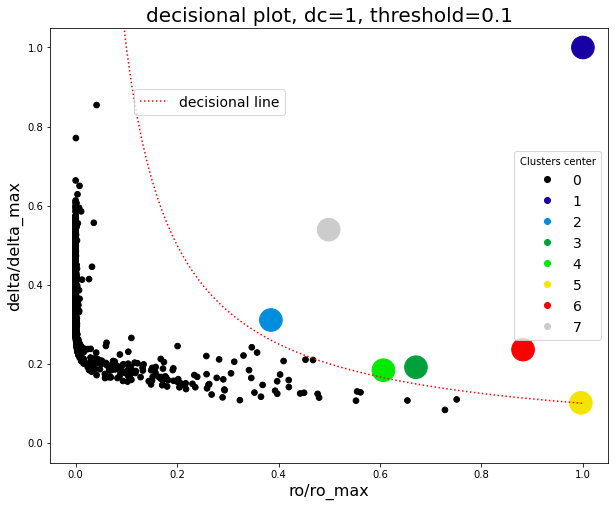

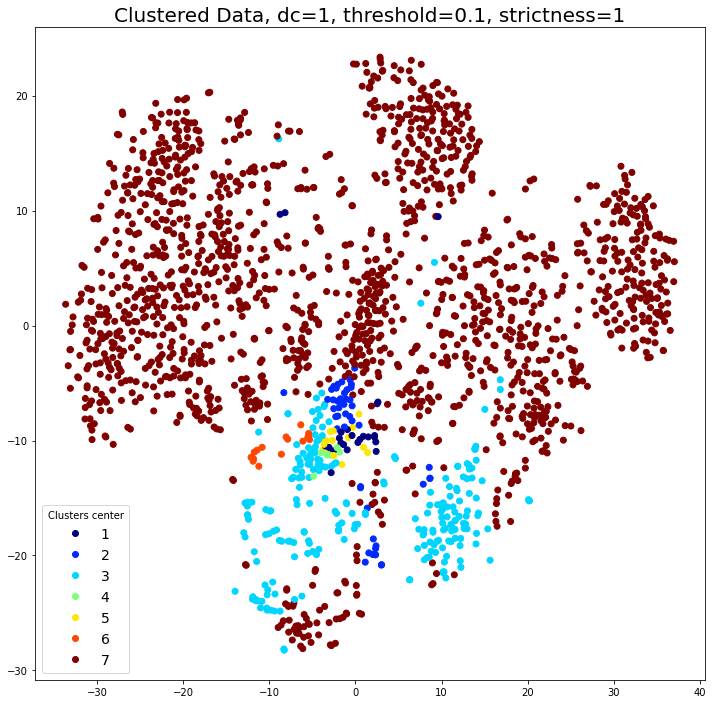

----- WARNING: there is not a border region for cluster nr.1 ------
----- WARNING: there is not a border region for cluster nr.2 ------
----- WARNING: there is not a border region for cluster nr.3 ------
----- WARNING: there is not a border region for cluster nr.4 ------
----- WARNING: there is not a border region for cluster nr.5 ------
----- WARNING: there is not a border region for cluster nr.6 ------
----- WARNING: there is not a border region for cluster nr.7 ------


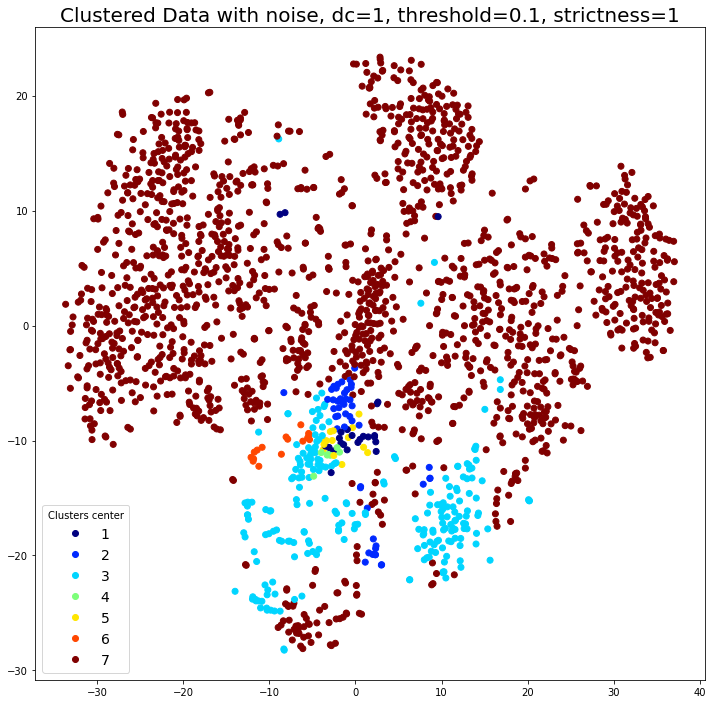

In [17]:
BBR = RLclustering(X[:5000,:])

dc = 1
threshold = 0.1
perpl = 100

BBR.clear_label()
BBR.ro_delta_graph(dc,gau_chi,threshold)
BBR.clusters_graph(dc,gau_chi,threshold, tsne_perplexity=perpl)
BBR.clusters_graph(dc,gau_chi,threshold, strictness=1, noise=True, tsne_perplexity=perpl);

In [ ]:
predicted_labels = BBR.get_labels() == 1
predicted_all = BBR.get_labels()

predicted = np.sum(predicted_labels)
correct = np.sum(y_tran*predicted_labels)
total = np.sum(y_tran)

NMI_tr = normalized_mutual_info_score(y_tran, predicted_all)
print('NMI:', NMI_tr)
print("precision:",correct/predicted)
print("recall:",correct/total)